<a href="https://colab.research.google.com/github/ksenera/jupyter_notebooks/blob/main/A4_Ksenera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Personalized Dataset based on my D = 24 and S = 07
D = 24
S = 7

dataset = [
    [D-1, S+1, 0],
    [D+3, S-2, 0],
    [D-5, S+3, 1],
    [D+2, S-4, 1]
]

df = pd.DataFrame(dataset, columns=['x1', 'x2', 'y'])

# x1, x2 = features & y = label
features = df[['x1', 'x2']]
labels = df['y']

# Given the log-odd function is: g(x) = x1−x2−D & the coefficients are 1, -1 and -D
coef = np.array([[1, -1]])
bias = np.array([-D])


In [ ]:
# from section 2 - walkthrough of the algo page 3/8

def log_odds(features, coefficients, bias):
    return np.dot(features, coefficients.T) + bias

# define here first section 2 7.  page 4/8
def sigmoid(log_odds):
    denominator = 1 + np.exp(-log_odds)
    return 1 / denominator

# Task 1 - Calculate the probability
# section 2 6. page 3/8
result_log_odds = log_odds(features, coef, bias)
p_hat = sigmoid(result_log_odds)

print("Probabilities:")
print(p_hat)

Probabilities:
[[1.23394576e-04]
 [1.19202922e-01]
 [3.05902227e-07]
 [2.68941421e-01]]


In [ ]:
# Task 2 - Determine predicted label y-hat
# from logistic_regression_titanic_age.ipynb section 2. 10. page 6/8
def predict(features, coefficients, bias, threshold):
    result_log_odds = log_odds(features, coefficients, bias)
    p_hat = sigmoid(result_log_odds)
    return np.where(p_hat >= threshold, 1, 0)

predicted_result = predict(features, coef, bias, 0.5)
print("Predicted labels y-hat:")
print(predicted_result)

Predicted labels y-hat:
[[0]
 [0]
 [0]
 [0]]


In [ ]:
# Task 3 - Calculate log-loss
# section 2 9. page 6/8
def log_loss(probabilities, labels):
    return (-1 / labels.shape[0]) * np.sum(labels * np.log(probabilities) + (1-labels) * np.log(1-probabilities))

# need column vector so reshape
labels_reshaped = labels.to_numpy().reshape(-1, 1)
cost = log_loss(p_hat, labels_reshaped)

print("Log-loss:")
print(cost)

Log-loss:
4.110078351663298


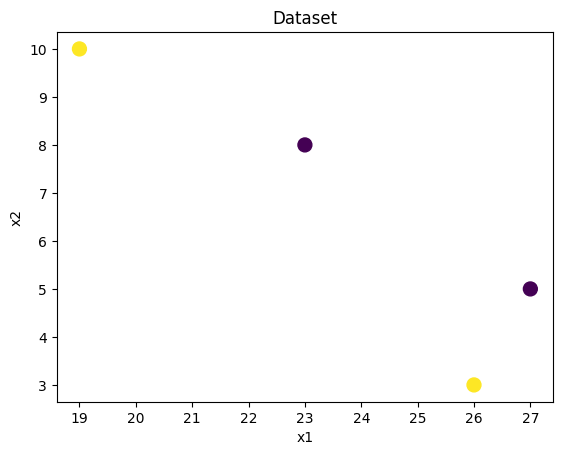

In [ ]:
plt.scatter(features['x1'], features['x2'], c=labels, s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('dataset')
plt.show()

I created a very basic plot above using Gemini's auto code completion.


Observations:

Unfortunately given the log-odds function g(x) = x1 - x 2 - 24, the only positive term x1 would have to be much larger than x2 to predict samples probably belonging to class c. However since my bias term -24 was so large negatively y-hat = 0, thus all 4 probabilities were < 0.5.